Výpočet tepové frekvence

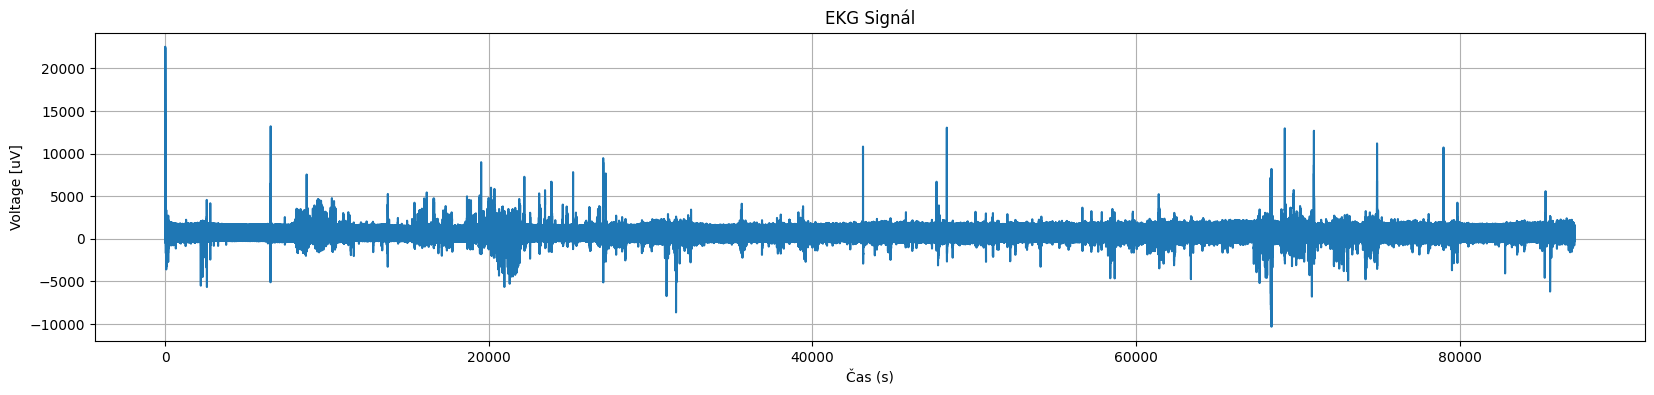

průměrná amplituda: 38724802.684384786
[4, 1012, 2014, 3014, 4102, 6516420, 6517561, 43125004, 48305925, 48306932, 69192105, 69193107, 70992754, 70993764, 74894646, 79003288]
[0.00000000e+00 1.00000001e-03 2.00000002e-03 ... 8.70869980e+04
 8.70869990e+04 8.70870000e+04] 0.011023459299321369


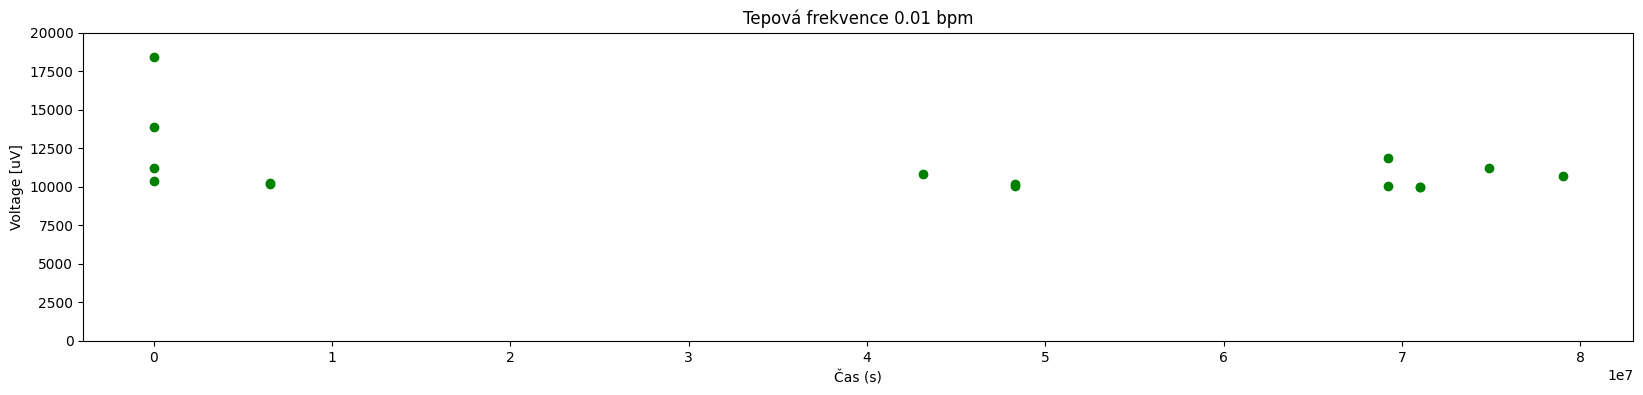

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

#algoritmus pro detekci R vrcholů v signálech + prezentace tepové frekvence při jednotlivých měřeních
def Nacti_soubor(cesta_k_souboru): return wfdb.rdrecord(cesta_k_souboru)

# nejdřív si načtu jednotlivá měření, abych věděl, jak to vypadá
ecg_mereni = Nacti_soubor(r"C:\Users\Patrik\OneDrive\Plocha\PZS\seminarni_prace_1\mereni_signalu\100001\100001_ECG")
#print("Informace o EKG měření:", ecg_mereni.__dict__) 

#vezmu si ze souboru jednotlivé signály
ecg_signal = ecg_mereni.p_signal 
#print(ecg_signal[::50]) #testování
vz_f = ecg_mereni.__dict__['fs'] #vemu si vzorkovací frekvenci měření
time = len(ecg_signal)/vz_f #vypočítáme celkový čas měření
time_axis = np.linspace(0, time, len(ecg_signal)) #uděláme si časovou osu měření
plt.figure(figsize=(20, 4))
plt.plot(time_axis,ecg_signal)
plt.title("EKG Signál")
plt.xlabel("Čas (s)")
plt.ylabel("Voltage [uV]")
plt.grid()
plt.show() #!se dlouho načítá!

#určím si parametry pro výpočet
amplitudy = ecg_signal[:, 0]; 
dolni_mez = 1000
x_coords = [i for i in range(len(amplitudy)) if amplitudy[i] > dolni_mez]
prumer_x = sum(x_coords) / len(x_coords)
print(f"průměrná amplituda: {prumer_x}")
min_peaks_height = 7000 #zvolím si minimální výšku vrcholů, která je ideální dané ekg
min_distance = int(vz_f)*5 #minimální vzdálenost mezi vrcholi bude vzorkovací frekvence

#nyní si vytvořím algoritmus na detekci r vrcholů
r_peaks = [] #seznam, kam si uložím souřadnice vrcholů
for i in range(1, len(ecg_signal)-1):
    if ecg_signal[i]>min_peaks_height:
        #zkontroluji že hodnota je větší něž okolní hodnoty
        if ecg_signal[i]>ecg_signal[i-1] and ecg_signal[i]>ecg_signal[i+1]:
            if len(r_peaks) == 0 or (i-r_peaks[-1]>=min_distance): 
                r_peaks.append(i)
print(r_peaks[:20]) #testování

#r_peaks_hodnoty = [ecg_signal[i] if i in r_peaks else None for i in range(len(ecg_signal))]

tepova_f = ((len(r_peaks)*60) / time) #výpočet tepové frekvence v BPM ((soucet r vrcholu*60/cas)
#zaokrouhlena_tepova_f = round(tepova_f,2) #zaokrouhlím na celé číslo
print(time_axis,tepova_f)
plt.figure(figsize=(20,4))
plt.plot(r_peaks,[ecg_signal[i] for i in r_peaks], linestyle='None', marker='o', color='green', label="R-vrcholy")
plt.title("R vrcholy z EKG Signálu")
plt.xlabel("Čas (s)")
plt.ylabel("Voltage [uV]")
plt.title(f"Tepová frekvence {tepova_f:.2f} bpm")
plt.ylim([0,20000]) #nastavím si x od 0 do 20000
plt.show()